In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

diabetes_data = pd.read_csv("../data/diabetes.csv")
diabetes_data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [2]:
# Схоже що тільки Outcome колонка - категорійна
diabetes_data_numbers = diabetes_data.drop(columns=["Outcome"])
diabetes_data_categorical = diabetes_data[["Outcome"]].copy()

In [3]:
# Мода, медіана, математичне очікування;
stats_df = pd.DataFrame(
    {
        "mean": diabetes_data_numbers.mean(),
        "median": diabetes_data_numbers.median(),
        "mode": diabetes_data_numbers.select_dtypes(include="int").mode().iloc[0],
    }
).T
stats_df.head(3)

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
mean,33.240885,31.992578,69.105469,0.471876,120.894531,79.799479,3.845052,20.536458
median,29.000000,32.000000,72.000000,0.372500,117.000000,30.500000,3.000000,23.000000
mode,22.000000,NaN,70.000000,NaN,99.000000,0.000000,1.000000,0.000000


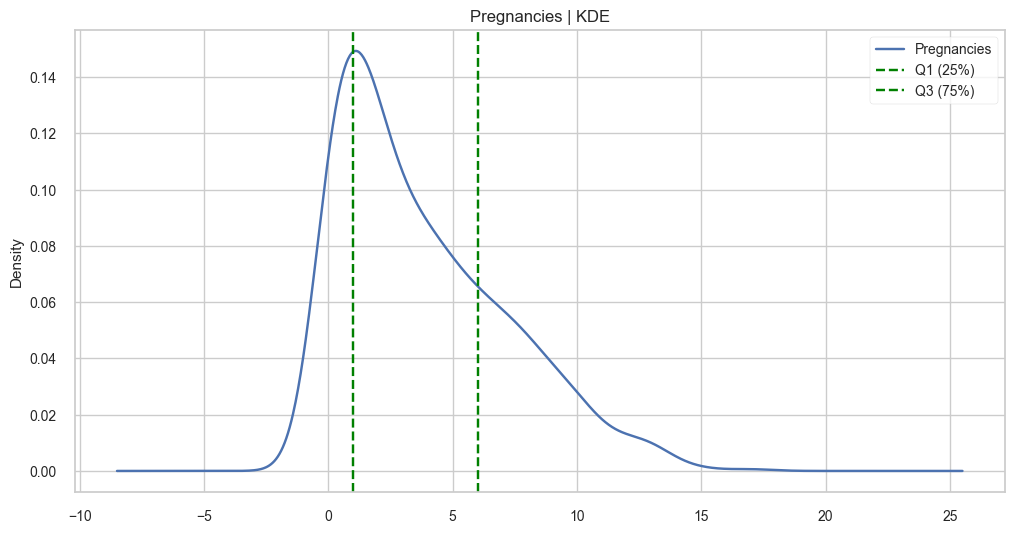

In [55]:
# Pregnancies

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = diabetes_data["Pregnancies"].quantile(0.25)
q3 = diabetes_data["Pregnancies"].quantile(0.75)
ax = diabetes_data["Pregnancies"].plot(kind="kde", title="Pregnancies | KDE")
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Короткий і різкий зліва, більший і пологий зправа.

# Розмір IQR відносно решти розподілу
# - Середньої ширини, зсунутий вправо відносно піку.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Візуально схожий на LogNormal

In [5]:
# Pregnancies
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(diabetes_data["Pregnancies"])

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.90 не дуже близько до нормалі, відповідно  p<= 0.05, тож нормальність відхиляємо

(np.float64(0.9042812714701655), np.float64(1.6092572358874225e-21), np.False_)

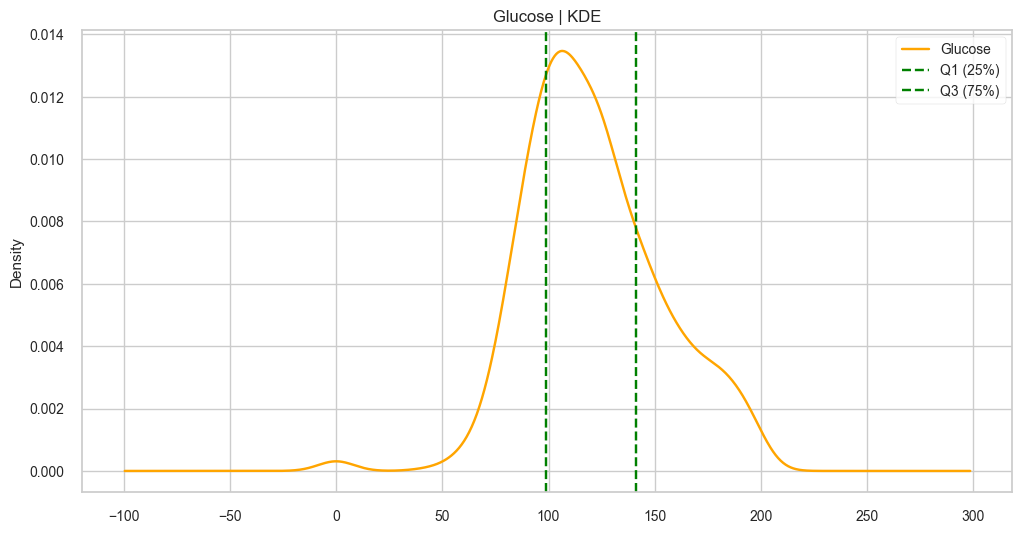

In [54]:
# Glucose

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = diabetes_data["Glucose"].quantile(0.25)
q3 = diabetes_data["Glucose"].quantile(0.75)
ax = diabetes_data["Glucose"].plot(kind="kde", color="orange", title="Glucose | KDE")
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Короткий і різкий зліва, також присутня аномалія в районі нуля, більший і пологий зправа.

# Розмір IQR відносно решти розподілу
# - Середньої ширини, зсунутий вправо відносно піку.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Схожий на попередній, але більше проглядається Gamma

In [7]:
# Glucose
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(diabetes_data["Glucose"])

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.97 що дуже близько до нормалі, проте  p<= 0.05 тож нормальність відхиляємо

(np.float64(0.9701038379391942), np.float64(1.9863474999979633e-11), np.False_)

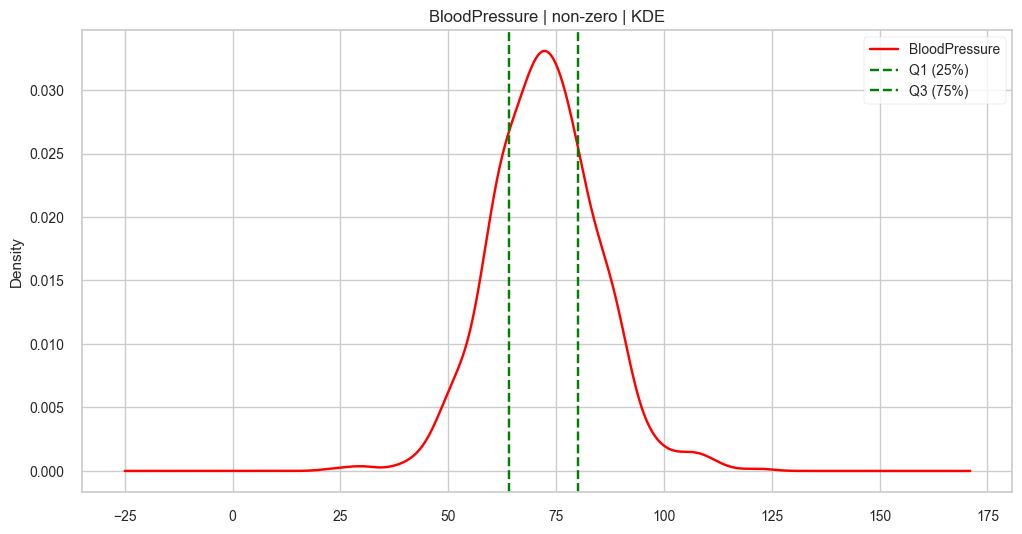

In [53]:
# BloodPressure

# Побудувати вертикальні лінії IQR для кожного графіку.
non_zero_bp = diabetes_data.loc[diabetes_data["BloodPressure"] != 0, "BloodPressure"]
q1 = non_zero_bp.quantile(0.25)
q3 = non_zero_bp.quantile(0.75)
ax = non_zero_bp.plot(kind="kde", color="red", title="BloodPressure | non-zero | KDE")
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Хвости досить короткі, правий трохи довший - маємо невичку асиметрію.

# Розмір IQR відносно решти розподілу
# - Вузький, охоплює по суті лише основну масу в районі піку

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Дуже схожий на нормальний, але маємо певні погрішності з правого боку

In [9]:
# BloodPressure
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(non_zero_bp)

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.97 що дуже близько до нормалі, проте  p<= 0.05 тож нормальність відхиляємо

(np.float64(0.990314515469343), np.float64(9.451377169640385e-05), np.False_)

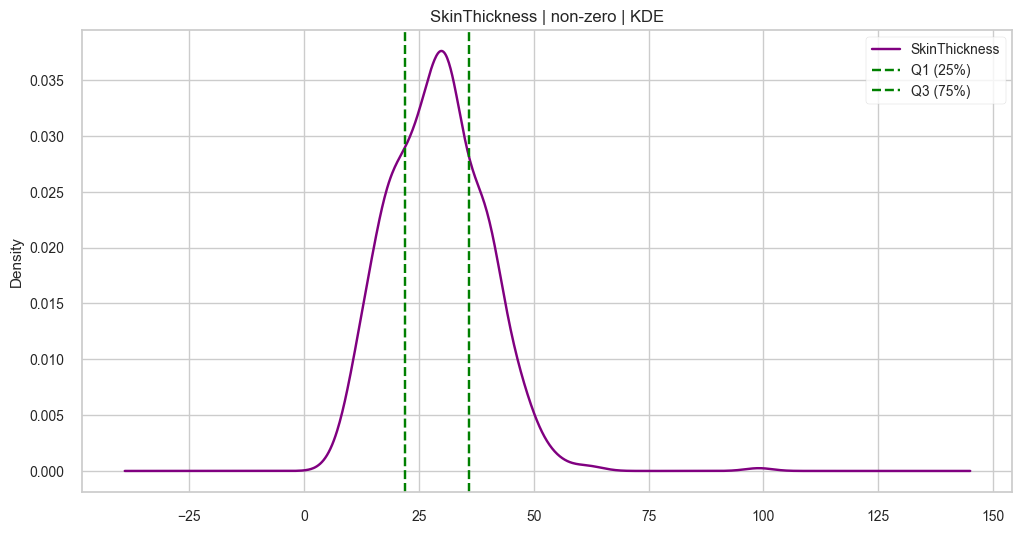

In [52]:
# SkinThickness

# Побудувати вертикальні лінії IQR для кожного графіку.
non_zero_st = diabetes_data.loc[diabetes_data["SkinThickness"] != 0, "SkinThickness"]
q1 = non_zero_st.quantile(0.25)
q3 = non_zero_st.quantile(0.75)
ax = non_zero_st.plot(
    kind="kde", color="purple", title="SkinThickness | non-zero | KDE"
)
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Хвости короткі, майже симетричні. Хоч пік і зміщений правіше.

# Розмір IQR відносно решти розподілу
# - Вузький, охоплює по суті лише основну масу в районі піку

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Дуже схожий на нормальний, але маємо ще якісь погрішності в районі 100, ну і пік не ідеально рівний

In [11]:
# SkinThickness
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(non_zero_st)

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.97 що дуже близько до нормалі, проте  p<= 0.05 тож нормальність відхиляємо

(np.float64(0.9679992373343264), np.float64(1.775690206383192e-09), np.False_)

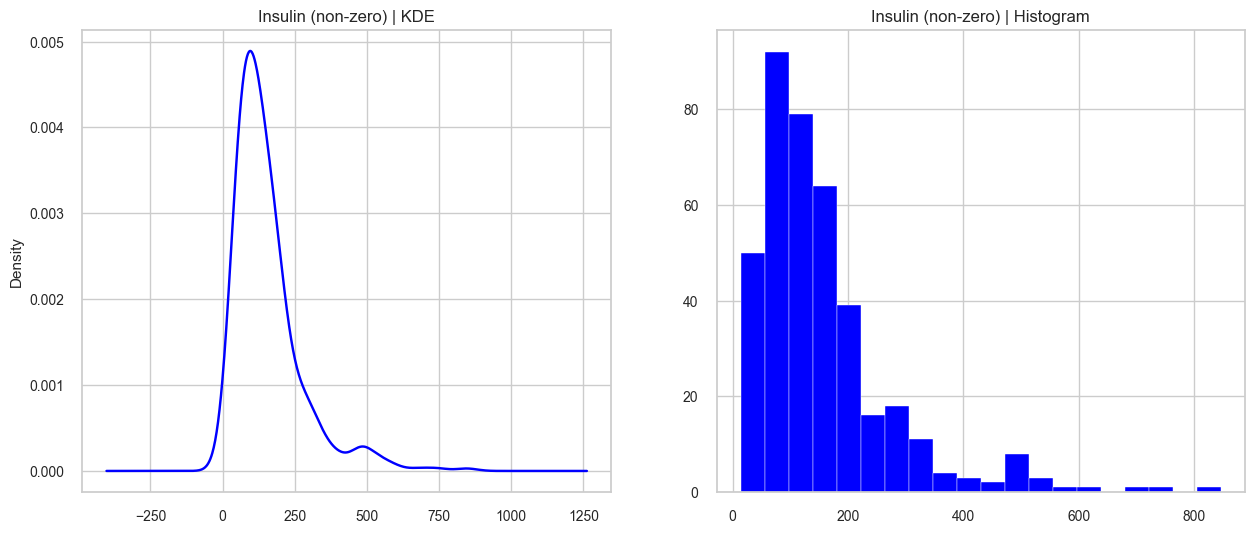

In [51]:
# Insulin

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
diabetes_data["Insulin"].plot(kind="kde", ax=axes[0], color="blue")
diabetes_data["Insulin"].hist(bins=20, ax=axes[1], color="blue")

axes[0].set_title("Insulin | KDE")
axes[1].set_title("Insulin | Histogram")

# Великий пік на нулі, тобто на пропущених значення, тому відфільтровуємо нулі щоб чіткіге побачити розподіл.
plt.show()

non_zero_insulin = diabetes_data.loc[diabetes_data["Insulin"] != 0, "Insulin"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
non_zero_insulin.plot(kind="kde", ax=axes[0], color="blue")
axes[0].set_title("Insulin (non-zero) | KDE")

non_zero_insulin.hist(bins=20, ax=axes[1], color="blue")
axes[1].set_title("Insulin (non-zero) | Histogram")

plt.show()
# Висновок:
# Після фільтрації нулів бачимо сильну правосторонню асиметрію.
# Чіткий пік зліва з довгим пологим хвостом вправо - схоже на LogNormal або Gamma

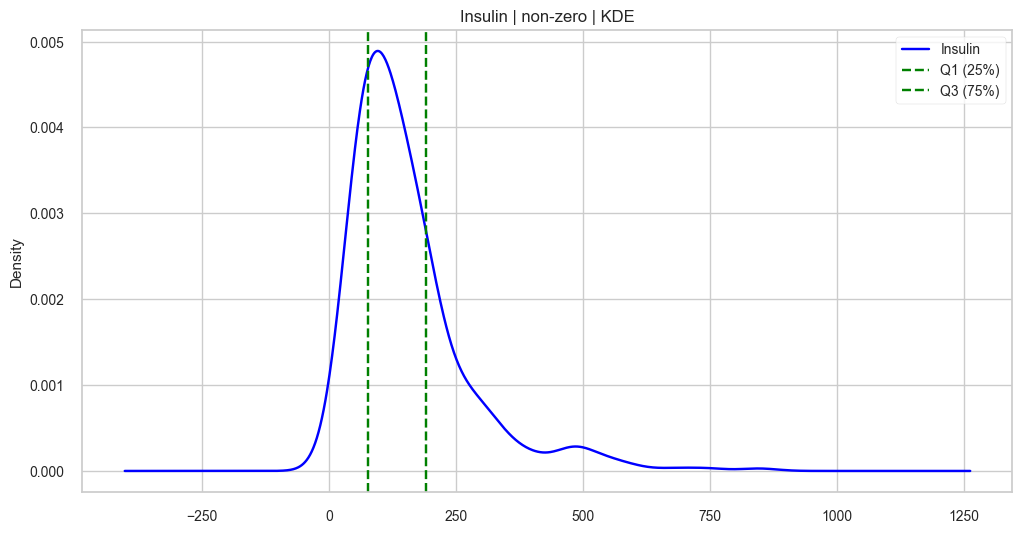

In [50]:
# Insulin

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = non_zero_insulin.quantile(0.25)
q3 = non_zero_insulin.quantile(0.75)
ax = non_zero_insulin.plot(kind="kde", color="blue", title="Insulin | non-zero | KDE")
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Лівий хвіст дуже короткий і різкий, правий дуже довгий і пологий - сильна асиметрія.

# Розмір IQR відносно решти розподілу
# - Вузький, зміщений дуже сильно вліво, охоплює основну масу даних біля піку.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Зовсім не нормальний. Класичний LogNormal - сильна правостороння асиметрія

In [14]:
# Insulin
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(non_zero_insulin)

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.88 що далеко від нормалі, p<= 0.05 тож нормальність відхиляємо

(np.float64(0.8040996182702659), np.float64(1.6982183020696754e-21), np.False_)

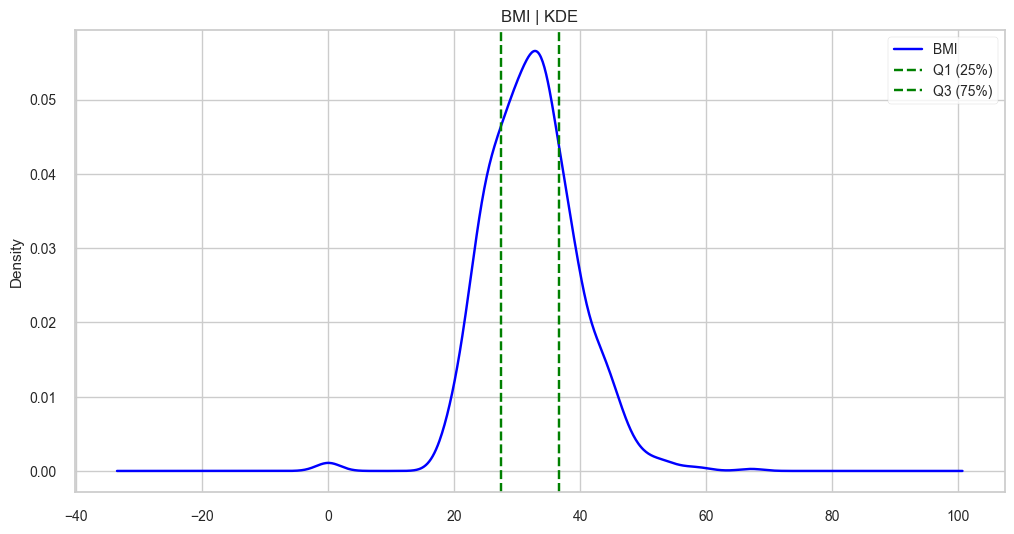

In [48]:
# BMI

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = diabetes_data["BMI"].quantile(0.25)
q3 = diabetes_data["BMI"].quantile(0.75)
ax = diabetes_data["BMI"].plot(kind="kde", color="blue", title="BMI | KDE")
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Обидва хвости помірної довжини, правий трохи довший - легка правостороння асиметрія.

# Розмір IQR відносно решти розподілу
# - Середньої ширини, добре центрований відносно піку.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Дуже схожий на нормальний

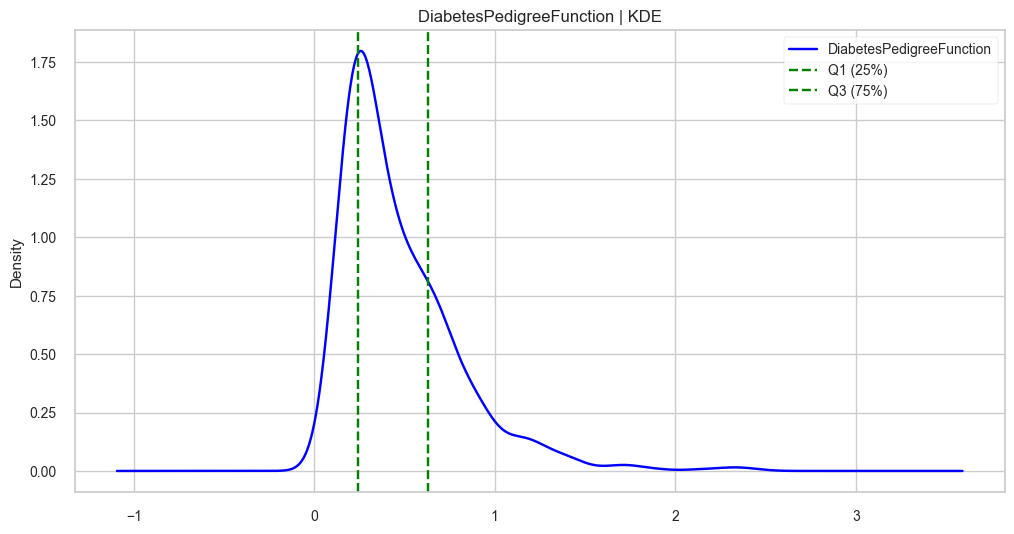

In [49]:
# DiabetesPedigreeFunction

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = diabetes_data["DiabetesPedigreeFunction"].quantile(0.25)
q3 = diabetes_data["DiabetesPedigreeFunction"].quantile(0.75)
ax = diabetes_data["DiabetesPedigreeFunction"].plot(
    kind="kde", color="blue", title="DiabetesPedigreeFunction | KDE"
)
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Дуже короткий і різкий зліва, довгий і пологий зправа - асиметрія.

# Розмір IQR відносно решти розподілу
# - Вузький, зміщений вліво.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Зовсім не нормальний. Схоже на Exponential або Gamma розподіл

In [17]:
# DiabetesPedigreeFunction
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(diabetes_data["DiabetesPedigreeFunction"])

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.83 що далеко від нормалі, p<= 0.05 тож нормальність відхиляємо

(np.float64(0.8365181321396535), np.float64(2.477505530854268e-27), np.False_)

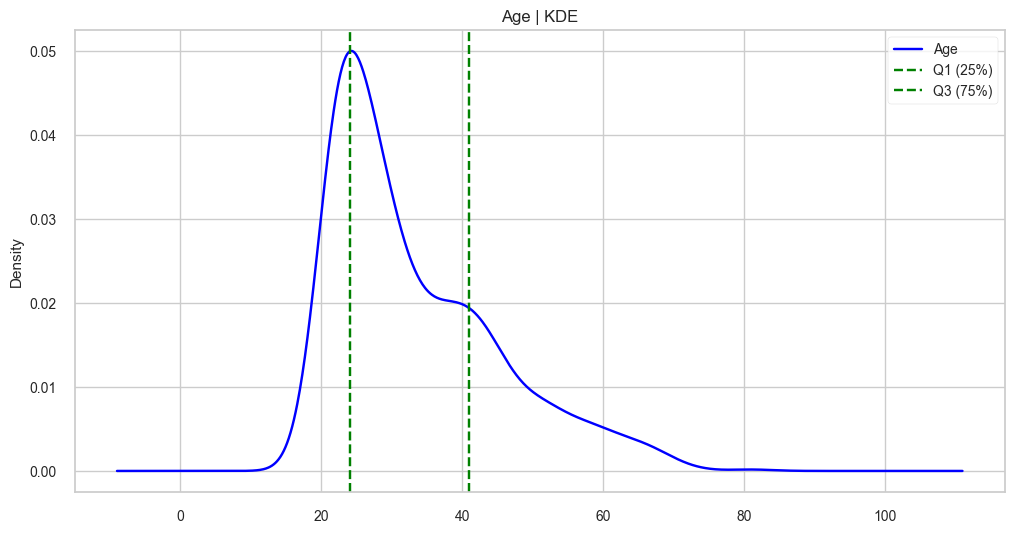

In [47]:
# Age

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = diabetes_data["Age"].quantile(0.25)
q3 = diabetes_data["Age"].quantile(0.75)
ax = diabetes_data["Age"].plot(kind="kde", color="blue", title="Age | KDE")
ax.axvline(q1, color="green", linestyle="--", label="Q1 (25%)")
ax.axvline(q3, color="green", linestyle="--", label="Q3 (75%)")
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Короткий і різкий зліва (мінімальний вік), довгий і пологий зправа.

# Розмір IQR відносно решти розподілу
# - Середньої ширини, зміщений вліво, більшість молодих людей.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Правостороння асиметрія, схоже на LogNormal

In [19]:
# Age
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(diabetes_data["Age"])

stat, p_value, p_value > 0.05
# Висновок:
# Маємо 0.89 що не дуже близько до нормалі, p<= 0.05 тож нормальність відхиляємо

(np.float64(0.8747668643940426), np.float64(2.4022741290400888e-24), np.False_)

In [20]:
# В першу чергу думаю варто передивитись наявні типи відповідно до фактичних (і потенційно можливих) значень.
# Більшість цілочислених колонок мають тільки додатні значення і лягають в діапазон 0-255, тож підуть у unit8.
# Glucose, Insulin - можуть мітити (або містять) очікувані значення більші за 255, проте все ще не потребують відʼємних значень, залсужено йдуть в uint16.
# флоати просто трохи урізаємо з стандарного 64 до 32.
diabetes_data = pd.read_csv(
    "../data/diabetes.csv",
    dtype={
        "Pregnancies": "uint8",
        "Glucose": "uint16",
        "BloodPressure": "uint8",
        "SkinThickness": "uint8",
        "Insulin": "uint16",
        "BMI": "float32",
        "DiabetesPedigreeFunction": "float32",
        "Age": "uint8",
        "Outcome": "uint8",
    },
)
diabetes_data.info()

# Як результат маємо зменшення з 54.1КБ до 13КБ, виглядає досить непогано.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    uint8  
 1   Glucose                   768 non-null    uint16 
 2   BloodPressure             768 non-null    uint8  
 3   SkinThickness             768 non-null    uint8  
 4   Insulin                   768 non-null    uint16 
 5   BMI                       768 non-null    float32
 6   DiabetesPedigreeFunction  768 non-null    float32
 7   Age                       768 non-null    uint8  
 8   Outcome                   768 non-null    uint8  
dtypes: float32(2), uint16(2), uint8(5)
memory usage: 12.9 KB


In [21]:
# Про всяк випадок додаю Id, щоб легше було відстежити записи після змін
import numpy as np

diabetes_data.insert(0, "row_id", np.arange(len(diabetes_data), dtype="int64"))

In [22]:
# Далі перейдемо до нулів, для початку подивимось чи є вони у нас і де вони можуть бути проблемою.
diabetes_data[(diabetes_data == 0).any(axis=1) | diabetes_data.isna().any(axis=1)]

,row_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.599998,0.627,50,1
1,1,1,85,66,29,0,26.600000,0.351,31,0
2,2,8,183,64,0,0,23.299999,0.672,32,1
3,3,1,89,66,23,94,28.100000,0.167,21,0
4,4,0,137,40,35,168,43.099998,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.900002,0.171,63,0
764,764,2,122,70,27,0,36.799999,0.340,27,0
765,765,5,121,72,23,112,26.200001,0.245,30,0
766,766,1,126,60,0,0,30.100000,0.349,47,1


In [23]:
(diabetes_data == 0).groupby(diabetes_data["Outcome"], observed=True).sum()

# В мене була теорія що можливо дані заповнені не рівномірно по категоріях. Типу значення інсуліну пропущено для НЕ діабетиків.
# Але вона не справдилась тож будемо працювати з усім разом.

,row_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,,,,,,,,,,
0,0,73,3,19,139,236,9,0,0,500
1,1,38,2,16,88,138,2,0,0,0


In [24]:
# null та NaN не маємо, що вже добре. Тож зосередимось на 0.
# Для вагітностей - це окей. По Glucose і BMI є пару по пару пропусків, а от SkinThickness і Insulin (як не дивно, в таблиці по діабету) мають багато пропущених записів.

# Мені здається що генерувати штучно 15-20% записів це якось занадто, тож заповню лише ті колонки які мають невелику кількість пропусків
cols_with_missing = ["Glucose", "BloodPressure", "BMI"]

diabetes_data_non_nulled = diabetes_data.copy(deep=True)


# Медіана в межах категорії виглядає досить адекватно.
diabetes_data_non_nulled[cols_with_missing] = diabetes_data_non_nulled.groupby(
    "Outcome", observed=True
)[cols_with_missing].transform(lambda s: s.mask(s == 0, s.mask(s == 0).median()))

(diabetes_data_non_nulled[cols_with_missing] == 0).sum().sort_values(ascending=False)

Glucose          0
BloodPressure    0
BMI              0
dtype: int64

In [25]:
# Тепер розглянемо інші викиди
# Для початку їх треба знайти


def iqr_outliers(df, cols, k=1.5):
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr

    outliers = (df[cols] < lower) | (df[cols] > upper)
    return outliers, outliers.sum(), lower, upper


num_cols = diabetes_data_non_nulled.select_dtypes(include="number").columns.drop(
    ["row_id", "Outcome"], errors="ignore"
)

outlier_mask, outlier_counts, lower, upper = iqr_outliers(
    diabetes_data_non_nulled, cols_with_missing
)

outlier_counts.sort_values(ascending=False)

BloodPressure    14
BMI               8
Glucose           0
dtype: int64

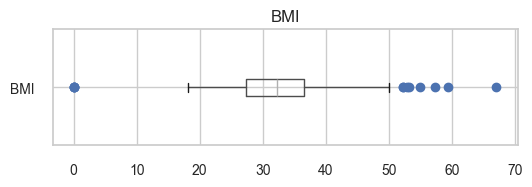

In [46]:
# Хочеться власними очима глянуть на ті викиди
import matplotlib.pyplot as plt

cols_with_outliers = outlier_counts[outlier_counts > 0].index

for c in cols_with_outliers:
    plt.figure(figsize=(6, 1.5))
    diabetes_data_non_nulled[[c]].boxplot(vert=False, sym="bo")
    plt.title(c)
    plt.show()

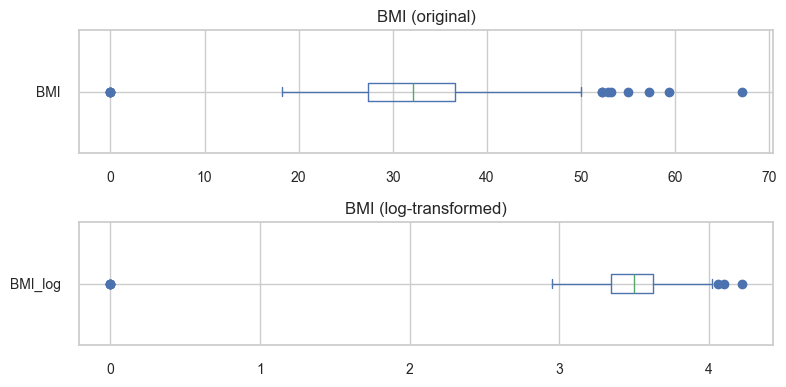

In [45]:
# Виглядають ці викиди досить прийнятно, тому обрізати їх не бачу сенсу. Натомість трансформуємо.
# Наскільки я зрозумів цей підхід більш корисний якщо в подальшому дані будуть викоритовувати моделі.

diabetes_data_non_nulled["BMI_log"] = np.log1p(diabetes_data_non_nulled["BMI"])

fig, axes = plt.subplots(2, 1, figsize=(8, 4))

diabetes_data_non_nulled["BMI"].plot(
    kind="box", vert=False, ax=axes[0], title="BMI (original)", sym="bo"
)

diabetes_data_non_nulled["BMI_log"].plot(
    kind="box", vert=False, ax=axes[1], title="BMI (log-transformed)", sym="bo"
)

plt.tight_layout()
plt.show()

# Викидів ми не прям позбулися, певні екстримальні значення все ще лишись, але хвіст однозначно менш розтягнутий.

In [28]:
# Враховуючи що BloodPressure обмежений людською природою, то я думаю тут буде доречно зробити sanity checks.
# Оскільки людина (жива і неушкоджена) не може мати тиск більше та менше певного значення,
# то ми не можумо розлядати екстримальні значення як викиди, а радше мусимо розлядати як некоретно введення даних.
# Вже використовував перезапис значень і трансформацію, тож на цей раз підемо шляхом додаткового поля-прапору.


diabetes_data_non_nulled["BloodPressure_invalid"] = (
    (diabetes_data_non_nulled["BloodPressure"] < 40)
    | (diabetes_data_non_nulled["BloodPressure"] > 200)
).astype("boolean")
# Потенційно може бути категорією, але не певен чи є сенс якщо там тру-фолс,
# а розділяти на лов-норм-хай теж наразі не бачу сенсу.

diabetes_data_non_nulled[diabetes_data_non_nulled["BloodPressure_invalid"] == True]

,row_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_log,BloodPressure_invalid
18,18,1,103,30.0,38,83,43.299999,0.183,33,0,3.790985,True
125,125,1,88,30.0,42,99,55.000000,0.496,26,1,4.025352,True
597,597,1,89,24.0,19,25,27.799999,0.559,21,0,3.360375,True
599,599,1,109,38.0,18,120,23.100000,0.407,26,0,3.182212,True


In [29]:
# Також думаю що варто зробити sanity check для Age та BMI
invalid_age_mask = (diabetes_data_non_nulled["Age"] < 10) | (
    diabetes_data_non_nulled["Age"] > 100
)
invalid_bmi_mask = (diabetes_data_non_nulled["BMI"] < 10) | (
    diabetes_data_non_nulled["BMI"] > 60
)
diabetes_data_non_nulled["Age_invalid"] = invalid_age_mask.astype("boolean")
diabetes_data_non_nulled["BMI_invalid"] = invalid_bmi_mask.astype("boolean")

diabetes_data_non_nulled

,row_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_log,BloodPressure_invalid,Age_invalid,BMI_invalid
0,0,6,148,72.0,35,0,33.599998,0.627,50,1,3.543854,False,False,False
1,1,1,85,66.0,29,0,26.600000,0.351,31,0,3.317816,False,False,False
2,2,8,183,64.0,0,0,23.299999,0.672,32,1,3.190476,False,False,False
3,3,1,89,66.0,23,94,28.100000,0.167,21,0,3.370738,False,False,False
4,4,0,137,40.0,35,168,43.099998,2.288,33,1,3.786460,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76.0,48,180,32.900002,0.171,63,0,3.523415,False,False,False
764,764,2,122,70.0,27,0,36.799999,0.340,27,0,3.632309,False,False,False
765,765,5,121,72.0,23,112,26.200001,0.245,30,0,3.303217,False,False,False
766,766,1,126,60.0,0,0,30.100000,0.349,47,1,3.437208,False,False,False


In [30]:
# Можемо порахувати цількість пропусків на рядок, і спробувати видалити ті, що мають надто багато пропусків. особливо це має сенс після кроку 4

zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
diabetes_data_non_nulled["zero_count"] = (diabetes_data_non_nulled[zero_cols] == 0).sum(
    axis=1
)
diabetes_data_non_nulled["zero_count"].value_counts().sort_index()

zero_count
0    394
1    147
2    227
Name: count, dtype: int64

In [31]:
# Також спробуємо на ориганільний таблиці
diabetes_data["zero_count"] = (diabetes_data[zero_cols] == 0).sum(axis=1)
diabetes_data["zero_count"].value_counts().sort_index()

# В оригінальний таблиці є декілька записів з тільки один заповненим параметром, тому пропоную їх не враховувати. Видалити ми зможемо по ID
rows_to_keep = diabetes_data["zero_count"] <= 3
diabetes_data_non_nulled = diabetes_data[rows_to_keep]

In [32]:
# ------ join ------

# Я вирішив додати якісь загальні значення відповідні до метрик з нашого датасету.
# Для цього додав табличку по BMI
bmi_ref = pd.read_csv("../data/bmi_ref.csv")
bmi_ref["risk_note"] = bmi_ref["risk_note"].replace(
    {
        "elevated cardiometabolic risk": "elevated risk",
        "high cardiometabolic risk": "high risk",
    }
)

diabetes_data = diabetes_data_non_nulled

In [33]:
# Оскільки у нас є лише значення BMI, а для категорій потрібні діапазони, то варто підрахувати
# і тим сами створити ключ для обʼєднання
def choose_category(bmi):
    for cat in bmi_ref.index:
        if bmi < bmi_ref.loc[cat, "bmi_max"] and bmi >= bmi_ref.loc[cat, "bmi_min"]:
            return bmi_ref.loc[cat, "bmi_cat"]


diabetes_data["bmi_cat"] = diabetes_data["BMI"].apply(lambda x: choose_category(x))
diabetes_data.head(10)

# Тепер можемо обʼєднати і доповнити відповідними даними з таблички по BMI
diabetes_data_enriched = diabetes_data.merge(bmi_ref, on="bmi_cat", how="left")

# diabetes_data_enriched.groupby('risk_note')['Outcome'].sum()

In [34]:
# ------ pivot ------
# У відсотках
(
    diabetes_data_enriched.pivot_table(
        index="severity_rank",
        columns="Outcome",
        values="row_id",
        aggfunc="count",
        fill_value=0,
    ).pipe(lambda x: round(x.div(x.sum(axis=1), axis=0) * 100, 2))
)

# Як бачимо то маємо чітку відповідність між рівнем ризику для Індексу маси тіла та наявності діабету.
# Важко сказати чи це причина чи наслідок, оскільки діабет може спиричиняти набір ваги, проте кореляція досить чітка.

Outcome,0,1
severity_rank,,
0,87.50,12.50
1,93.14,6.86
2,77.65,22.35
3,53.60,46.40


In [35]:
# ------ unstack ------

metrics = ["Glucose", "BloodPressure", "Age"]

s = diabetes_data_enriched.groupby(["severity_rank", "Outcome"])[metrics].median()
wide = s.unstack("Outcome")
print(wide)

# Glucose - видно чітку різницю між Outcome 0/1 незалежно від severity_rank.
# BloodPressure - не так сильно, але теж підвищений для групи з Outcome=1, також зростає відповідно до підняття severity_rank
# Age - в групі Outcome=1 медіана віку більша для всіх severity_rank, але не корелює з severity_rank як таким

              Glucose        BloodPressure         Age      
Outcome             0      1             0     1     0     1
severity_rank                                               
0               102.0  125.0          70.0  96.0  21.0  54.0
1               101.0  162.0          65.0  72.0  26.0  50.0
2               109.0  124.5          68.0  72.0  27.0  36.0
3               108.0  143.0          74.0  76.0  28.0  36.0


In [36]:
# concat
young = diabetes_data_enriched[diabetes_data_enriched["Age"] < 30].assign(
    age_group="young"
)
old = diabetes_data_enriched[diabetes_data_enriched["Age"] >= 30].assign(
    age_group="old"
)
combined = pd.concat([young, old], axis=0)
print(combined)
combined.groupby("age_group")["Outcome"].value_counts()

# Бачимо що вік є суттєвим ризиком діабету, так як для категорії old знаяення Outcome приблизно 50%
# Це також підтвреджує результати unstack аналізу.

age_group  Outcome
old        0          188
           1          183
young      0          306
           1           84
Name: count, dtype: int64

In [37]:
# melt
melted = diabetes_data_enriched.melt(
    id_vars=["row_id", "Outcome"],
    value_vars=["Glucose", "BloodPressure", "BMI"],
    var_name="metric",
    value_name="value",
)

# Порівняння медіан всіх метрик за Outcome
# Усі три показники вищі у групі з діабетом, особливо Glucose - що підтверджує його як ключевий маркер діабету (очевидно)
melted.groupby(["metric", "Outcome"])["value"].median().unstack()

Outcome,0,1
metric,,
BMI,30.1,34.299999
BloodPressure,70.0,74.000000
Glucose,107.0,140.000000


In [38]:
# transpose
stats = diabetes_data_enriched.groupby("Outcome")[
    ["Glucose", "BloodPressure", "BMI", "Age"]
].describe()
stats.T
# За допомогою транспортування можна зручно порівняти статистики по усім показникам, що особливо корисно коли у нас є багато метрик.

Outcome                       0           1
Glucose       count  494.000000  267.000000
              mean   110.200405  141.355805
              std     26.176541   31.958926
              min      0.000000    0.000000
              25%     93.000000  119.000000
              50%    107.000000  140.000000
              75%    125.000000  167.000000
              max    197.000000  199.000000
BloodPressure count  494.000000  267.000000
              mean    69.012146   71.089888
              std     16.522032   21.088058
              min      0.000000    0.000000
              25%     62.000000   66.000000
              50%     70.000000   74.000000
              75%     78.000000   82.000000
              max    122.000000  114.000000
BMI           count  494.000000  267.000000
              mean    30.672266   35.274155
              std      6.967151    6.949012
              min      0.000000    0.000000
              25%     25.600000   30.849999
              50%     30.100000   34.299999
              75%     35.299999   38.850000
              max     57.299999   67.099998
Age           count  494.000000  267.000000
              mean    31.285425   37.093633
              std     11.704332   10.980273
              min     21.000000   21.000000
              25%     23.000000   28.000000
              50%     27.000000   36.000000
              75%     37.000000   44.000000
              max     81.000000   70.000000

In [39]:
# Пере  демо до графіків
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.patches import Patch, Wedge
import warnings


warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")
plt.style.use("seaborn-v0_8-notebook")
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["font.size"] = 11

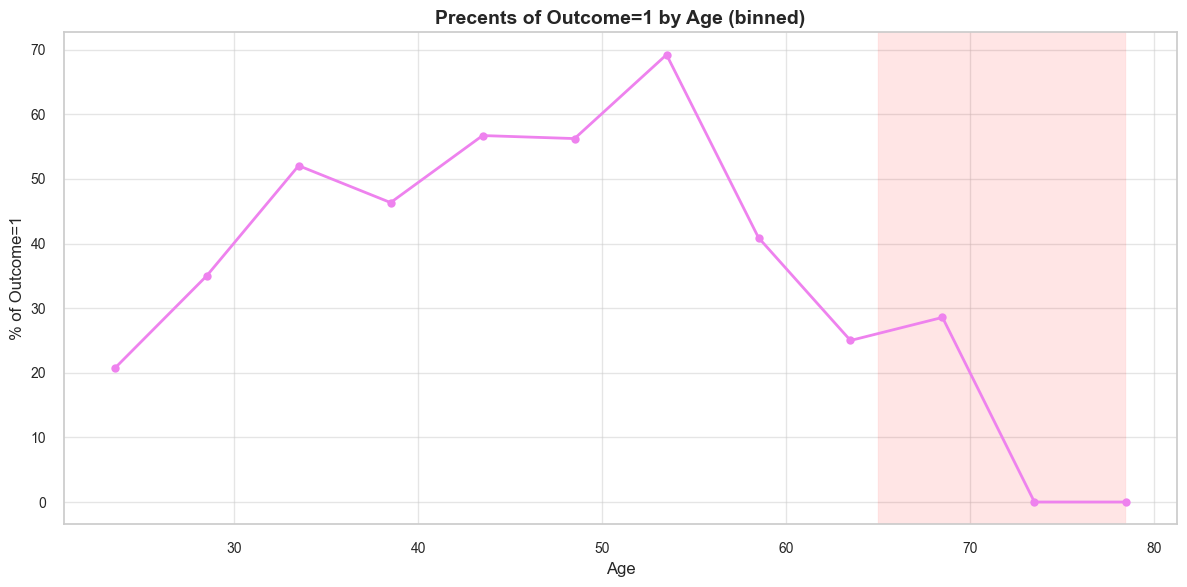

In [44]:
# Моя теорія: люди з поганим рівнем глюкози довго не живуть.

diabetes_data = diabetes_data_enriched


bin_size = 5
age_min = diabetes_data["Age"].min()
age_max = diabetes_data["Age"].max()
bins = pd.interval_range(start=age_min, end=age_max + bin_size, freq=bin_size)

diabetes_data["Age_bin"] = pd.cut(diabetes_data["Age"], bins=bins, include_lowest=True)

rate_pct = diabetes_data.groupby("Age_bin")["Outcome"].mean().mul(100).sort_index()

x = [interval.mid for interval in rate_pct.index]
y = rate_pct.values

fig, ax = plt.subplots()

ax.plot(x, y, color="violet", linewidth=2, marker="o", markersize=6)

ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("% of Outcome=1", fontsize=12)
ax.set_title("Precents of Outcome=1 by Age (binned)", fontsize=14, fontweight="bold")

ax.axvspan(65, 78.5, alpha=0.1, color="red", label="")

ax.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Бачимо що люди з діабетом не проходять поріг 70 років, принаймі в рамках цього датасету.
# Що підтверджує мою теорію стосовно рівня глюкози.

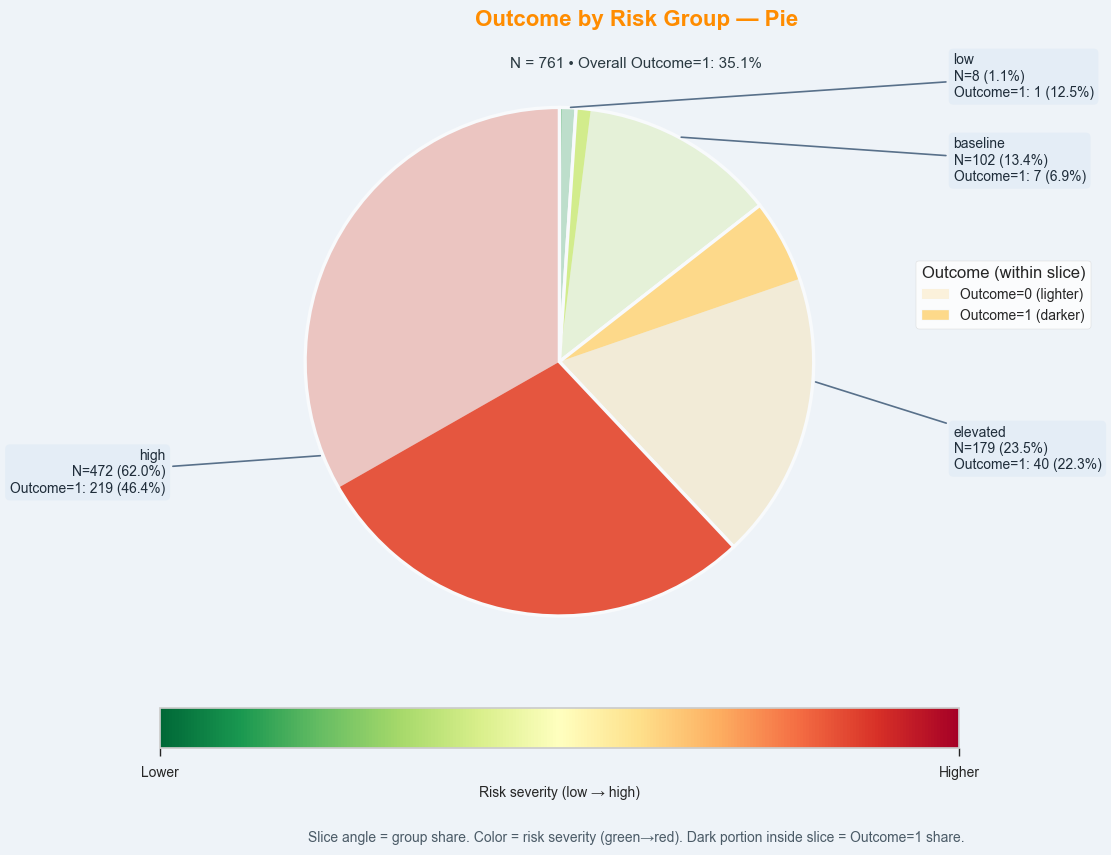

In [41]:
group_col = globals().get("group_col", "risk_note")
df = diabetes_data.dropna(subset=[group_col, "Outcome"]).copy()
df["Outcome"] = df["Outcome"].astype(int)

if "severity_rank" in df.columns and group_col == "risk_note":
    order = (
        df[[group_col, "severity_rank"]]
        .drop_duplicates()
        .sort_values("severity_rank")[group_col]
        .tolist()
    )
else:
    order = sorted(df[group_col].unique())

counts = (
    df.pivot_table(index=group_col, columns="Outcome", aggfunc="size", fill_value=0)
    .reindex(order)
    .fillna(0)
    .astype(int)
)
for col in (0, 1):
    if col not in counts.columns:
        counts[col] = 0
counts = counts[[0, 1]]

group_total = counts.sum(axis=1)
group_share = (group_total / max(1, len(df)) * 100).fillna(0)
group_rate = (counts[1] / group_total * 100).fillna(0)

cmap = mpl.colormaps.get_cmap("RdYlGn_r")
den = max(1, len(order) - 1)
base_colors = [cmap(0.15 + 0.70 * (i / den)) for i in range(len(order))]

bg = "#EEF3F8"
box_bg = "#E4EDF6"
edge = "#58708A"
wedge_sep = "#F8FAFC"
wedge_sep_lw = 2.4

# Будемо візуально виділяти частину сектору де ризик був реалізований за допомогою прозорості.
alpha_light = 0.28  # Outcome=0 area
alpha_dark = 0.95  # Outcome=1 area

fig, ax = plt.subplots(figsize=(14, 9), subplot_kw=dict(aspect="equal"))
fig.patch.set_facecolor(bg)
ax.set_facecolor(bg)

startangle = 90
clockwise = True
radius = 1.0

total_n = float(group_total.sum()) if float(group_total.sum()) > 0 else 1.0
cur = startangle

group_mid_angles = {}

for grp, base_col in zip(order, base_colors):
    n = float(group_total.loc[grp])
    span = 360.0 * (n / total_n)

    theta2 = cur
    theta1 = cur - span if clockwise else cur + span
    cur = theta1

    n1 = float(counts.loc[grp, 1])
    frac1 = (n1 / n) if n > 0 else 0.0
    frac1 = float(max(0.0, min(1.0, frac1)))

    dark_span = span * frac1
    light_span = span - dark_span

    dark_theta1 = theta2 - dark_span if clockwise else theta2
    dark_theta2 = theta2 if clockwise else theta2 + dark_span

    light_theta1 = theta1
    light_theta2 = dark_theta1 if clockwise else dark_theta2

    # Outcome=0
    if light_span > 0:
        ax.add_patch(
            Wedge(
                (0, 0),
                radius,
                theta1=light_theta1,
                theta2=light_theta2,
                facecolor=base_col,
                alpha=alpha_light,
                edgecolor="none",
                linewidth=0,
            )
        )

    # Outcome=1
    if dark_span > 0:
        ax.add_patch(
            Wedge(
                (0, 0),
                radius,
                theta1=dark_theta1,
                theta2=dark_theta2,
                facecolor=base_col,
                alpha=alpha_dark,
                edgecolor="none",
                linewidth=0,
            )
        )

    ax.add_patch(
        Wedge(
            (0, 0),
            radius,
            theta1=theta1,
            theta2=theta2,
            facecolor="none",
            edgecolor=wedge_sep,
            linewidth=wedge_sep_lw,
        )
    )

    group_mid_angles[grp] = (theta1 + theta2) / 2.0

ax.set_autoscale_on(False)
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.10, 1.10)

overall_rate = df["Outcome"].mean() * 100
fig.suptitle(
    "Outcome by Risk Group — Pie",
    fontsize=16,
    fontweight="bold",
    ha="center",
    color="darkorange",
)
fig.text(
    0.5,
    0.92,
    f"N = {len(df):,} • Overall Outcome=1: {overall_rate:.1f}%",
    ha="center",
    va="center",
    fontsize=11,
    color="#2B3A42",
)

items = []
for grp in order:
    ang = group_mid_angles.get(grp, 0.0)
    ang_rad = np.deg2rad(ang)

    x = np.cos(ang_rad)
    y = np.sin(ang_rad)

    n = int(group_total.loc[grp])
    share = float(group_share.loc[grp])
    n1 = int(counts.loc[grp, 1])
    pct1 = float(group_rate.loc[grp])

    # Урізаємо групу до одного слова, логічно б то було зробити в очистці, тож будемо знати на майбутнє.
    grp_label = grp.split()[0]
    text = "\n".join(
        [
            grp_label,
            f"N={n:,} ({share:.1f}%)",
            f"Outcome=1: {n1:,} ({pct1:.1f}%)",
        ]
    )

    side = 1 if x >= 0 else -1
    items.append({"x": x, "y": y, "side": side, "text": text})


def spread_y(sorted_items, min_dy=0.28, y_min=-0.95, y_max=0.95):
    if not sorted_items:
        return
    ys = [it["y"] for it in sorted_items]
    for i in range(1, len(ys)):
        ys[i] = max(ys[i], ys[i - 1] + min_dy)
    for i in range(len(ys) - 2, -1, -1):
        ys[i] = min(ys[i], ys[i + 1] - min_dy)
    if ys[0] < y_min:
        shift = y_min - ys[0]
        ys = [y + shift for y in ys]
    if ys[-1] > y_max:
        shift = y_max - ys[-1]
        ys = [y + shift for y in ys]
    for it, y in zip(sorted_items, ys):
        it["y_adj"] = max(y_min, min(y_max, y))


right = sorted([it for it in items if it["side"] == 1], key=lambda d: d["y"])
left = sorted([it for it in items if it["side"] == -1], key=lambda d: d["y"])
spread_y(right)
spread_y(left)

label_r = 1.55
for it in right + left:
    x_txt = it["side"] * label_r
    y_txt = it.get("y_adj", it["y"]) * 1.18
    ha = "left" if it["side"] == 1 else "right"

    ax.annotate(
        it["text"],
        xy=(it["x"], it["y"]),
        xytext=(x_txt, y_txt),
        ha=ha,
        va="center",
        fontsize=10,
        color="#1F2D3A",
        bbox=dict(boxstyle="round,pad=0.35", fc=box_bg, ec="none", alpha=0.95),
        arrowprops=dict(arrowstyle="-", color=edge, lw=1.2),
        annotation_clip=False,
    )

example = base_colors[len(base_colors) // 2]
ax.legend(
    handles=[
        Patch(
            facecolor=example,
            alpha=alpha_light,
            edgecolor=bg,
            label="Outcome=0 (lighter)",
        ),
        Patch(
            facecolor=example,
            alpha=alpha_dark,
            edgecolor=bg,
            label="Outcome=1 (darker)",
        ),
    ],
    title="Outcome (within slice)",
    bbox_to_anchor=(1.05, 0.62),
    loc="center left",
)

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=den))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.06, pad=0.10)
cbar.set_label("Risk severity (low → high)", fontsize=10)
cbar.set_ticks([0, den])
cbar.set_ticklabels(["Lower", "Higher"])

fig.text(
    0.5,
    0.06,
    "Slice angle = group share. Color = risk severity (green→red). Dark portion inside slice = Outcome=1 share.",
    ha="center",
    va="center",
    fontsize=10,
    color="#4B5B67",
)

ax.set_axis_off()
fig.subplots_adjust(left=0.05, right=0.84, top=0.90, bottom=0.16)
plt.show()

# Note: Темний фон IDE може зробити візуалізацію трохи контр-інтуітивною.
# Загалом, можемо бачити частину групи яка має діабет.
# Проте пай чарт дозволяє також показати частину кожної групи від загального числа, що досить зручно та інформативно.

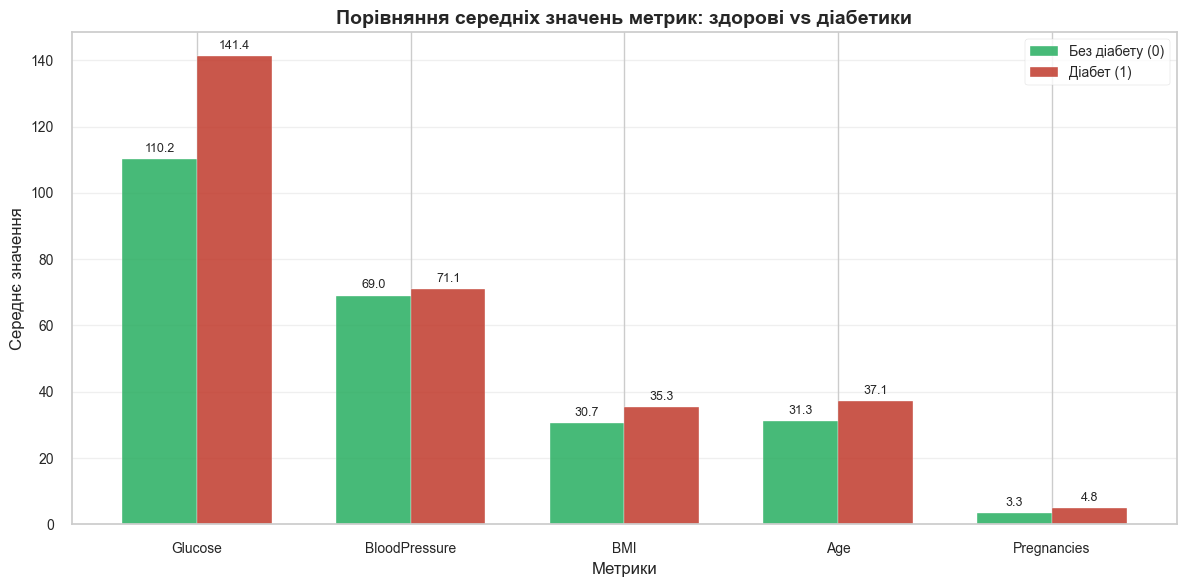

In [42]:
# Bar chart: Середні значення метрик для Outcome 1 and 0
# Порівнюємо середні значення основних показників здоров'я між групами.

metrics = ["Glucose", "BloodPressure", "BMI", "Age", "Pregnancies"]
means_by_outcome = diabetes_data.groupby("Outcome")[metrics].mean()

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(
    x - width / 2,
    means_by_outcome.loc[0],
    width,
    label="Без діабету (0)",
    color="#27ae60",
    alpha=0.85,
)
bars2 = ax.bar(
    x + width / 2,
    means_by_outcome.loc[1],
    width,
    label="Діабет (1)",
    color="#c0392b",
    alpha=0.85,
)

ax.set_xlabel("Метрики", fontsize=12)
ax.set_ylabel("Середнє значення", fontsize=12)
ax.set_title(
    "Порівняння середніх значень метрик: здорові vs діабетики",
    fontsize=14,
    fontweight="bold",
)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

for bar in bars1:
    height = bar.get_height()
    ax.annotate(
        f"{height:.1f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=9,
    )

for bar in bars2:
    height = bar.get_height()
    ax.annotate(
        f"{height:.1f}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=9,
    )

ax.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# Висновок: Пацієнти з діабетом мають вищі середні значення глюкози, індексу маси тіла та віку, що відповідає відомим факторам ризику для діабету.

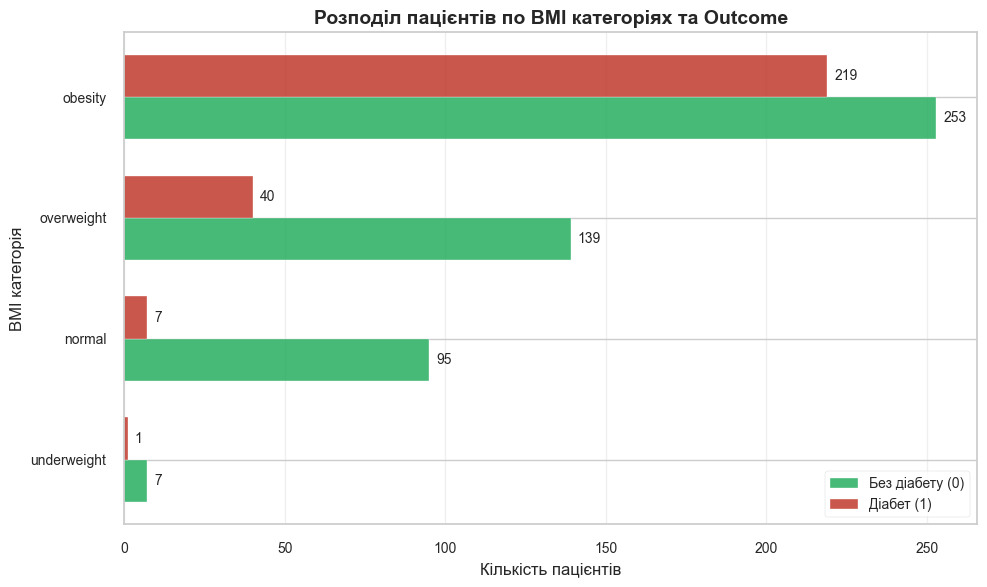

In [43]:
# horizontal bar chart: BMI Categories vs Outcome
# Порівнюємо розподіл категорій BMI між пацієнтами з діабетом та без.

order = ["underweight", "normal", "overweight", "obesity"]
bmi_outcome = diabetes_data.groupby(["bmi_cat", "Outcome"]).size().unstack(fill_value=0)
bmi_outcome = bmi_outcome.reindex([c for c in order if c in bmi_outcome.index])

fig, ax = plt.subplots(figsize=(10, 6))

y = np.arange(len(bmi_outcome))
height = 0.35

bars1 = ax.barh(
    y - height / 2,
    bmi_outcome[0],
    height,
    label="Без діабету (0)",
    color="#27ae60",
    alpha=0.85,
)
bars2 = ax.barh(
    y + height / 2,
    bmi_outcome[1],
    height,
    label="Діабет (1)",
    color="#c0392b",
    alpha=0.85,
)

ax.set_xlabel("Кількість пацієнтів", fontsize=12)
ax.set_ylabel("BMI категорія", fontsize=12)
ax.set_title(
    "Розподіл пацієнтів по BMI категоріях та Outcome", fontsize=14, fontweight="bold"
)
ax.set_yticks(y)
ax.set_yticklabels(bmi_outcome.index)
ax.legend()

for bar in bars1:
    width = bar.get_width()
    ax.annotate(
        f"{int(width)}",
        xy=(width, bar.get_y() + bar.get_height() / 2),
        xytext=(5, 0),
        textcoords="offset points",
        ha="left",
        va="center",
        fontsize=10,
    )

for bar in bars2:
    width = bar.get_width()
    ax.annotate(
        f"{int(width)}",
        xy=(width, bar.get_y() + bar.get_height() / 2),
        xytext=(5, 0),
        textcoords="offset points",
        ha="left",
        va="center",
        fontsize=10,
    )

ax.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

# Висновок: Група obesity має найбільшу кількість пацієнтів та найвищий відсоток діабетиків.
# Це підтверджує зв'язок між ожирінням та діабетом.